# Principle Component Analysis (PCA)

PCA is a popular technique that transform a dataset into a lower dimensional subsequence for visualization and to speed up the learning algorithm.

The principle of PCA is to find new dimensions (principle components) onto which to project the data so as to:
- minimize the projection error.
- maximize variance so that the data points are most spead out.

So these directions are where there is most variation and that is where there is more information.

## Importing libraries

In [197]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Loading and exploring data

Along this notebook we'll be using the famous iris dataset that can be found in (https://archive.ics.uci.edu/ml/datasets/Iris). The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant.

In [198]:
df = pd.read_csv( filepath_or_buffer='https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', 
                 header=None, sep=',')

In [199]:
feature_names = ["sepal_len", "sepal_width", "petal_len", "petal_width"]
df.columns = feature_names + ["class"] #setting the names of columns
target_names= df["class"].unique().tolist()#names of diffrent classes of the iris plant
df.tail()

,sepal_len,sepal_width,petal_len,petal_width,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [200]:
df["class"].value_counts()

Iris-virginica     50
Iris-versicolor    50
Iris-setosa        50
Name: class, dtype: int64

In [201]:
df.describe()

,sepal_len,sepal_width,petal_len,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [202]:
df.isnull().sum()

sepal_len      0
sepal_width    0
petal_len      0
petal_width    0
class          0
dtype: int64

After having a look at the distribution of our variables, let's now convert our predictors (features) and our outcome (classes) to numpy arrays

In [203]:
X = df[feature_names].values # X is an array of shape (150,4)
X[0:5,:]

array([[ 5.1,  3.5,  1.4,  0.2],
       [ 4.9,  3. ,  1.4,  0.2],
       [ 4.7,  3.2,  1.3,  0.2],
       [ 4.6,  3.1,  1.5,  0.2],
       [ 5. ,  3.6,  1.4,  0.2]])

Our outcome will be converted from categorical to numerical

In [204]:
from sklearn.preprocessing import LabelEncoder
number = LabelEncoder()
y = df["class"].values
y = number.fit_transform(Y.astype(str)) #Y is an array of shape(150,)
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

To get a feeling for how the 3 different flower classes are distributes along the 4 different features, let us visualize them via histograms.

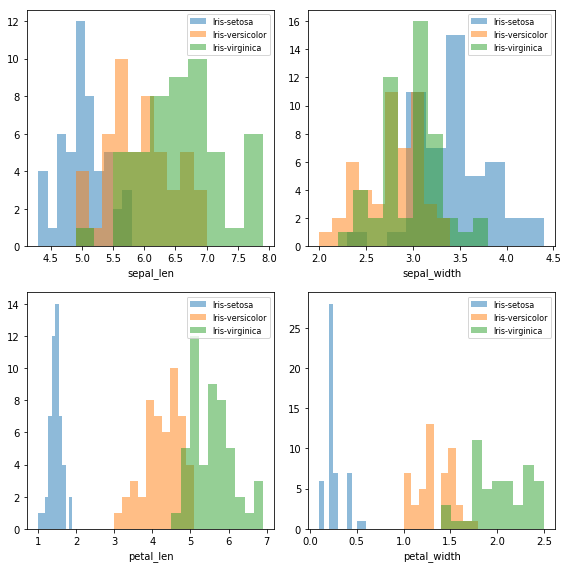

In [205]:
plt.figure(figsize=(8,8))
for i, feat in enumerate (feature_names):
    plt.subplot(2,2,i+1)
    for categ in target_names:
        plt.hist(df[df['class']==categ][feat], label=categ, bins=10, alpha=0.5)
    plt.xlabel(feat)
    plt.legend(loc=0, fancybox=True, fontsize=8)
plt.tight_layout()
plt.show()

## Implementation of PCA

### Data Preprocessing

Before we apply PCA, there is a data preprocessing step that we must perform. We have to scale features to have comparable range of values. 

In [206]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X_std = scaler.transform(X)

### Covariance Matrix

The covariance is a measure of how to variables change with respect to each other

In [207]:
cov_matrix = np.cov(X_std.T)
print ("covariance matrix: \n", cov_matrix)

covariance matrix: 
 [[ 1.00671141 -0.11010327  0.87760486  0.82344326]
 [-0.11010327  1.00671141 -0.42333835 -0.358937  ]
 [ 0.87760486 -0.42333835  1.00671141  0.96921855]
 [ 0.82344326 -0.358937    0.96921855  1.00671141]]


### Computing the Eigenvalues and Eigenvectors of the covariance matrix

The eigenvectors (principle components) determine the directions of the new feature space, and the eigenvalues determine their magnitude which is to say the variance of the data along the new features' axes.

In [208]:
eig_values,eig_vects = np.linalg.eig(cov_matrix)

We can use the sigular value decomposition to improve the computational efficiency.

In [209]:
U,S,Vh = np.linalg.svd(cov_matrix)

They have the same results.

In [210]:
print("eigenvalues from eigen decomposition \n", eig_values)
print("eigenvalues from sigular value decomposition \n",S)

eigenvalues from eigen decomposition 
 [ 2.93035378  0.92740362  0.14834223  0.02074601]
eigenvalues from sigular value decomposition 
 [ 2.93035378  0.92740362  0.14834223  0.02074601]


In [211]:
print("eigenvectors from eigen decomposition \n",eig_vects)
print("eigenvectors from singular value decomposition \n",U)

eigenvectors from eigen decomposition 
 [[ 0.52237162 -0.37231836 -0.72101681  0.26199559]
 [-0.26335492 -0.92555649  0.24203288 -0.12413481]
 [ 0.58125401 -0.02109478  0.14089226 -0.80115427]
 [ 0.56561105 -0.06541577  0.6338014   0.52354627]]
eigenvectors from singular value decomposition 
 [[-0.52237162 -0.37231836  0.72101681  0.26199559]
 [ 0.26335492 -0.92555649 -0.24203288 -0.12413481]
 [-0.58125401 -0.02109478 -0.14089226 -0.80115427]
 [-0.56561105 -0.06541577 -0.6338014   0.52354627]]


### Sorting the eigenvalues

The eigenvectors are ranked from highest to lowest. The lowest ones bare the least information about the distribution of the data.

In [212]:
eig_pairs = list(zip(eig_values, eig_vects.T))
#eig_pairs = [(eig_values[ind],eig_vects[:, ind]) for ind in range(len(eig_values))]

In [213]:
eig_pairs.sort(reverse=True)
sorted_eigVals = [eig_pairs[ind][0] for ind in range(len(eig_values))]
sorted_eigVects = [eig_pairs[ind][1] for ind in range(len(eig_values))]
print("sorted eigenvalues \n",sorted_eigVals)

sorted eigenvalues 
 [2.930353775589317, 0.92740362151734268, 0.14834222648163983, 0.020746013995595849]


### Choosing the number of principal components

In [214]:
retained_var_cum = np.cumsum(sorted_eigVals)/np.sum(sorted_eigVals)
retained_var_cum

array([ 0.72770452,  0.95800975,  0.99484807,  1.        ])

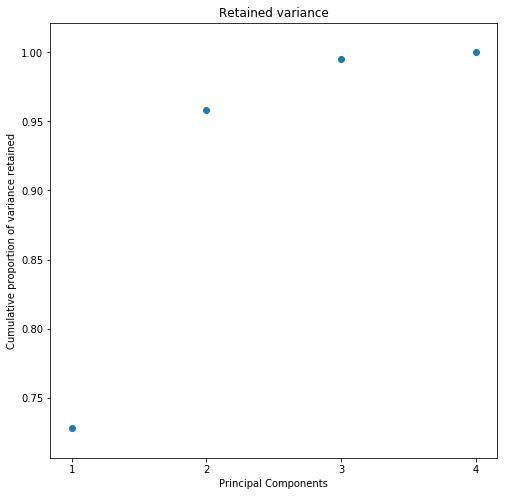

In [215]:
fig, ax = plt.subplots(figsize=(8,8))
ax.scatter(range(1,len(sorted_eigVals)+1), retained_var_cum)
ax.set_xticks(range(1,len(sorted_eigVals)+1))
ax.set_xlabel("Principal Components")
ax.set_ylabel("Cumulative proportion of variance retained")
ax.set_title("Retained variance")

### Projecting the data

We want to reduce our data for visualization purposes so we'll assign the first two columns of eigenvectors to "dim_reduce" which represent our new dimensions.

In [216]:
dim_reduce = np.array(sorted_eigVects[0:2]).T
#dim_reduce= np.hstack((eig_pairs[0][1].reshape(4,1), eig_pairs[1][1].reshape(4,1)))
Z = np.dot(X_std, dim_reduce)

### Visualizing the data

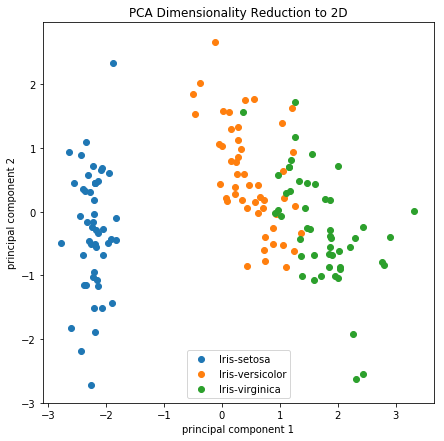

In [217]:
plt.figure(figsize=(7,7))
for i,cl in enumerate(target_names):
    plt.scatter(Z[:,0][y==i],Z[:,1][y==i], label=cl)
plt.title("PCA Dimensionality Reduction to 2D")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.legend(loc="lower center")

## PCA with scikit learn

In [224]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca_model = pca.fit_transform(X_std)

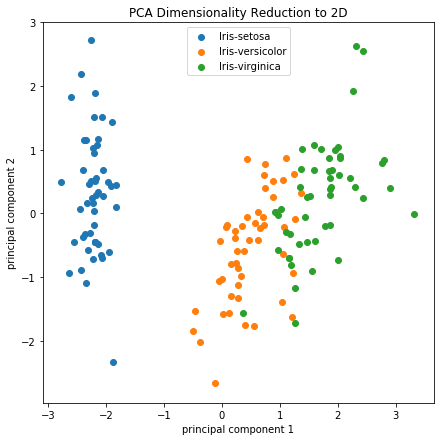

In [225]:
plt.figure(figsize=(7,7))
for i,cl in enumerate(target_names):
    plt.scatter(pca_model[:,0][y==i],pca_model[:,1][y==i], label=cl)
plt.title("PCA Dimensionality Reduction to 2D")
plt.xlabel("principal component 1")
plt.ylabel("principal component 2")
plt.legend(loc = "upper center")